<a href="https://colab.research.google.com/github/LSMISN/NSI/blob/master/Recursivite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notion de récursivité

## Introduction

### 1- Quelques exemples issues des mathématiques

#### 1-1 Somme des entiers

Il s'agit ici d'écrire un programme qui permette de calculer la somme des n premiers entiers :

> S(n) = 0 + 1 + 2 + 3 + ... + n

In [ ]:
""" A titre d'exercice, écrire la fonction somme(n) 
qui permette de calculer cette somme pour 
un paramètre n donné en paramètre """

def somme(n):
  s = 0
  for i in range(n+1):
    s = s + i
  return s

print(somme(3)) # somme(3) = 0 + 1 + 2 + 3 = 6
print(somme(4)) # somme(4) = 0 + 1 + 2 + 3 + 4 = 10

6
10


Pour une personne familière avec la programmation, cette manière de décrire et coder  la fonction mathématique demandée est naturelle. Cependant, cette écriture n'a pas de relation directe avec S(n) = 0 + 1 + ... + n.

Une manière de remédier à cela serait d'une part de ré-écrire la définition de la fonction somme de manière plus académique :

$$\Bigg\{
  \begin{eqnarray*}
  S(n) = 0 \ si \ n = 0, \\
  S(n) = n + S(n-1) \ si \ n>0.
  \end{eqnarray*}
$$

La fonction S(n) est définit par récurrence c'est-à-dire que dans l'expression de S(n) on trouve la fonction elle-même mais appliquée sur un paramètre différent n-1.

On peut écrire cette fonction en Python quasiment directement

In [ ]:
# écriture de la fonction somme(n)
# à partir de sa formulation mathématique

def somme2(n):
  if n == 0 :
    return 0
  else:
    return n + somme2(n-1)

print(somme2(3)) # donne 6
print(somme2(4)) # donne 10

6
10


On constate qu'à l'instar de la définition, le code de la fonction somme2(n) s'appelle elle-même dans le corps de sa définition.

On appelle cela la <span style="font-size: 14px;color: red">Récursivité</span>

On peut constater sur cet exemple simple que la fonction tourne plusieurs fois en **boucle**, cependant il n'apparait pas dans le code de structure de boucle explicite (for, while)

Cette opération de récursivité bien qu'elle soit élégante au niveau de l'écriture pourra dans certain algorithme amener le programme à boucler indéfiniment. C'est pour cela que la définition des fonctions qui à priori pourront être écrites de récursivement sont accompagnées très souvent :
- d'au moins un cas de base dans la définition : ici S(0) = 0
- suivi d'un cas récursif

Remarque : On parle de récursivité terminale, lorsque le cas récursif apparait à la fin du code.

Les cas de base serviront la plupart du temps de conditions d'arrêt.

#### 1-2 Calcul de la puissance

On veut calculer 

$puissance(x,n) = x^n = x*x*x*...$ (n fois)

Comment définir par récurrence cette fonction ?

On peut par exemple écrire :

$$puissance(x,n) = \Bigg\{
  \begin{eqnarray*}
  1 \ si \ n = 0, \\
  x * puissance(x,n-1) \ si \ n>0.
  \end{eqnarray*}
$$

Exercice : écrire une version itérative de puissance, puis sa version recursive

In [ ]:
def puissance(x,n):
  if n == 0:
    return 1
  elif n == 1:
    return x
  else:
    p=1
    for i in range(n):
      p=p*x
    return p

def puissance_rec(x,n):
  if n == 0:
    return 1
  else:
    return x * puissance_rec(x, n-1)

print(puissance(2,0))
print(puissance(2,1))
print(puissance(2,3))
print(puissance_rec(2,0))
print(puissance_rec(2,1))
print(puissance_rec(2,3))

1
2
8
1
2
8


#### 1-3 Calcul de la factorielle

la fonction factorielle d'un entier naturel n est définie par :

$n! = n * (n-1) * (n-2) * ...*1$ pour tout entier non nul et

$0!=1$ pour n=0

Écrire la relation sous forme de récurrence, implémenter et tester la fonction sous sa forme récursive.

In [ ]:
""" Fonction factorielle recursive """
def factorielle(n):
  if n == 0:
    return 1
  else:
    return n*factorielle(n-1)

print(factorielle(1))
print(factorielle(3))

1
6


#### 1-4 La suite de Fibonacci

En mathématiques, la suite de Fibonacci est une suite d'entiers dans laquelle chaque terme est la somme des deux termes qui le précèdent. Elle commence par les termes 0 et 1 Les termes de cette suite sont appelés nombres de Fibonacci.

[Page Wikipédia sur la suite de Fibonacci](https://fr.wikipedia.org/wiki/Suite_de_Fibonacci)

La fonction qui renvoie la valeur du nombre de Fibonacci de rang n est définie comme :

$$fibonacci(n) = \Bigg\{
  \begin{eqnarray*}
  0 \ si \ n = 0, \\
  1 \ si \ n = 1, \\
  fibonacci(n-1) + fibonacci(n-2) \ si \ n>1.
  \end{eqnarray*}
$$

Écrire la fonction fibo(n) qui renvoie le nombre de la suite de Fibonacci de rang n 

In [ ]:
""" Renvoye le nombre de la suite de Fibonacci de rang n"""
def fibo(n):
  if n == 0:
    return 0
  elif n == 1:
    return 1
  else:
    return fibo(n-1)+fibo(n-2)

print(fibo(4)) # doit renvoyer 3
print(fibo(7)) # doit renvoyer 13

3
13


L'arbre des appels de fibo(4) est le suivant :
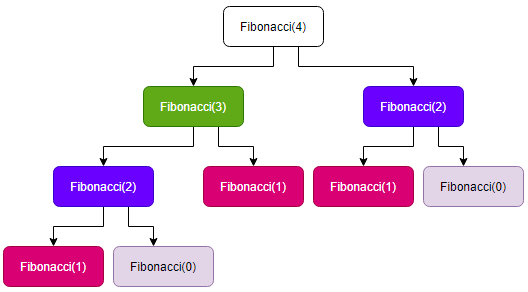

On constate que l'implémentation par récursivité est conforme à la définition donnée mathématiquement. 

On constate que certains calculs (case de même couleurs) sont effectuées plusieurs fois, ce qui fait perdre du temps et de la performance de calcul.

Une solution est de mémoriser les calculs au fur à mesure dans une table et que le code aille chercher la valeur directement dans la table si elle a été déjà stockée. On appelle cela la **Memoisation**. Il s'agit d'une technique de programmation dite dynamique : on memorise les résultats au fur à mesure pour les ré-utiliser plus tard, ce qui réduit le temps de calcul.

### CONCLUSION

Dans les principes généraux pour écrire une fonction récursivement on retiendra :
- la fonction récursive doit contenir une condition d'arrêt
- les paramètres passés dans les appels récursifs doivent être différents de ceux passés en argument,
- après un nombre fini d'appels, la (ou les) valeur(s) passées en paramètres doivent satisfaires la condition d'arrêt.

Tout programme codé sous forme récursive peut l'être de manière itérative.

Les appels successifs de la fonction elle-même s'empile au fur à mesure dans la pile d'exécution. Ceci peut-être un désavantage dans la rapidité de traitement et dans la quantité de mémoire utilisée. En Python, tout le contexte d'exécution est sauvegardé dans la pile à chaque appel, ce qui peut occasionné des **dépassements de pile (StackOverflow)**.
Le langage CAML utilise la récursivité de manière intensive, les appels sont alors optimisés. La complexité algorithmique doit donc être évaluée indépendamment du langage utilisé. 